# Table of Contents
 <p>

In this notebook, I will show that the transcripts in the *bx93*-associated class have expression levels that are significantly more altered in *sy622* homozygotes than in *bx93* homozygotes. I start by importing all the libraries and files.

In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# import own libraries
import epistasis as epi
import txtome as tx
import pretty_table as pretty

# plotting settings
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

# more parameters
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

genmap = pd.read_csv('../sleuth/rna_seq_info.txt', sep=' ', comment='#')
quant  = pd.read_csv('../output/SI1_dpy_22_results.csv')
quant = tx.fc_transcriptome(df=quant)

Dropped 0 rows with NaNs in the b column


I will extract the intersection between the transcripts that are differentially expressed in both the *bx93/bx93* and *sy622/sy622* genotypes. These transcripts are all, by definition contained within the *bx93*-associated class. The function to do that is defined in the cell below.

In [39]:
def get_x_and_y_from_df(overlap, df, strain1, strain2):
    
    df = df[df.target_id.isin(overlap)]
    
    x = df[df.strain==strain1]
    y = df[df.strain==strain2]
    
    return x.b.values, y.b.values, x.se_b.values, y.se_b.values

Let's go ahead and extract the relevant transcripts, and plot the results. I will also calculate the line of best fit for the results to get a sense for how much more perturbed the transcripts are in one genotype relative to the other.

1.6094267775048168


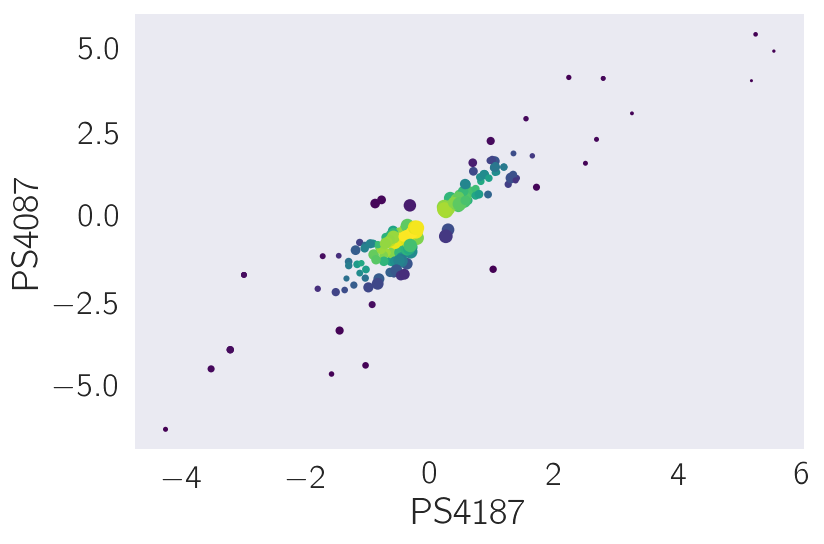

In [61]:
def odr(txtome, strain_x, strain_y):
    """
    Calculate a regression line of the STP between strain_x and strain_y
    """
    overlap = txtome.overlap([strain_x, strain_y])
    df = txtome.df[txtome.df.target_id.isin(overlap)]
    tmp = df[df.target_id.isin(overlap)]
    x = df[df.strain == strain_x]
    y = df[df.strain == strain_y]
    res = epi.perform_odr(x.b.values, y.b.values,
                          x.se_b.values, y.se_b.values,
                          beta0=[0.5])
    print(res.beta[0])

strains = ('PS4187', 'PS4087')
quant.plot_STP(*strains, label=True,
                       density=True, cmap='viridis')    
odr(quant, *strains)

0.941673775084171


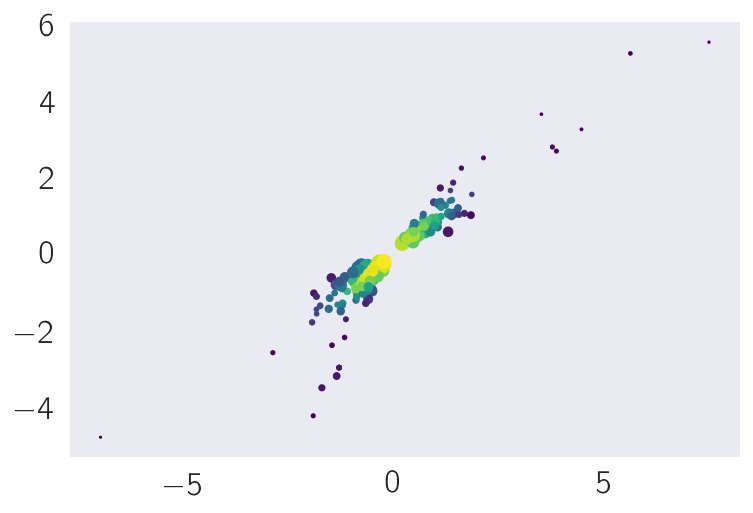

In [58]:
strains = ('PS4187', 'PS4176')
quant.plot_STP(*strains, label=True,
                       density=True, cmap='viridis')    
odr(quant, *strains)

0.7342071467022407


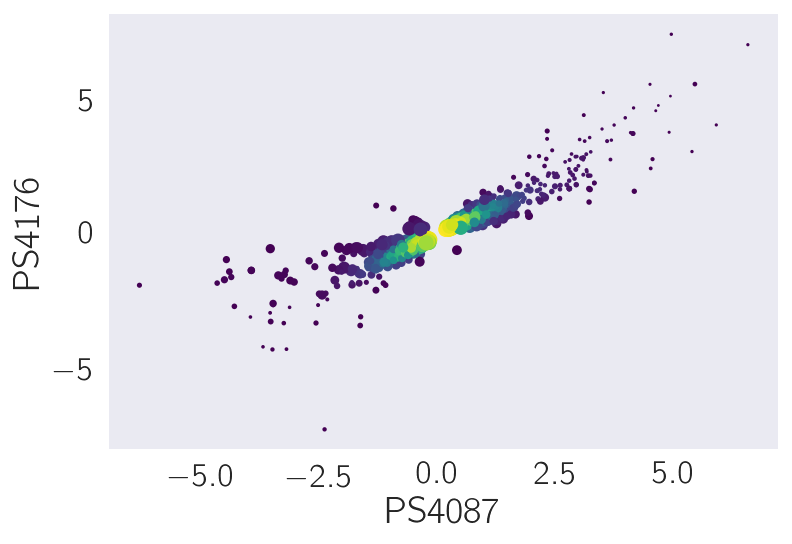

In [62]:
strains = ('PS4087', 'PS4176')
quant.plot_STP(*strains, label=True,
                       density=True, cmap='viridis')    
odr(quant, *strains)